In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/computervision/cats and dogs.zip"

Archive:  /content/drive/MyDrive/computervision/cats and dogs.zip
   creating: cats and dogs/
  inflating: cats and dogs/.DS_Store  
  inflating: cats and dogs/._.DS_Store  
   creating: cats and dogs/test/
   creating: cats and dogs/test/cats/
  inflating: cats and dogs/test/cats/cat.1500.jpg  
  inflating: cats and dogs/test/cats/cat.1501.jpg  
  inflating: cats and dogs/test/cats/cat.1502.jpg  
  inflating: cats and dogs/test/cats/cat.1503.jpg  
  inflating: cats and dogs/test/cats/cat.1504.jpg  
  inflating: cats and dogs/test/cats/cat.1505.jpg  
  inflating: cats and dogs/test/cats/cat.1506.jpg  
  inflating: cats and dogs/test/cats/cat.1507.jpg  
  inflating: cats and dogs/test/cats/cat.1508.jpg  
  inflating: cats and dogs/test/cats/cat.1509.jpg  
  inflating: cats and dogs/test/cats/cat.1510.jpg  
  inflating: cats and dogs/test/cats/cat.1511.jpg  
  inflating: cats and dogs/test/cats/cat.1512.jpg  
  inflating: cats and dogs/test/cats/cat.1513.jpg  
  inflating: cats and dogs/

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.models import Sequential

# Extracting image from directory/folder
from tensorflow.keras.utils import image_dataset_from_directory

In [17]:
train_path = "/content/cats and dogs/train"
test_path = "/content/cats and dogs/test"

train_data = image_dataset_from_directory(
    directory = train_path,
    image_size=(180,180),
    batch_size = 32
)

test_data = image_dataset_from_directory(
    directory = test_path,
    image_size = (180,180),
    batch_size = 32
)

Found 1904 files belonging to 2 classes.
Found 960 files belonging to 2 classes.


In [18]:
train_data.class_names

['cats', 'dogs']

# Transfer Learning

In [19]:
from tensorflow.keras.applications import VGG16

In [20]:
vgg16 = VGG16(weights='imagenet', include_top=False)
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [21]:
model2 = Sequential()
model2.add(Rescaling(1./255, input_shape=(180,180,3)))
model2.add(vgg16)
model2.add(Flatten())
model2.add(Dense(128,activation="relu"))
model2.add(Dense(1,activation='sigmoid'))

vgg16.trainable = False
model2.compile(loss='binary_crossentropy',optimizer="adam", metrics=["accuracy"])
model2.fit(train_data, validation_data=test_data,epochs=5)

Epoch 1/5
60/60 [==============================] - 10s 142ms/step - loss: 0.5165 - accuracy: 0.7988 - val_loss: 0.2448 - val_accuracy: 0.8958
Epoch 2/5
60/60 [==============================] - 9s 140ms/step - loss: 0.1627 - accuracy: 0.9359 - val_loss: 0.2664 - val_accuracy: 0.8854
Epoch 3/5
60/60 [==============================] - 9s 147ms/step - loss: 0.1060 - accuracy: 0.9648 - val_loss: 0.2118 - val_accuracy: 0.9156
Epoch 4/5
60/60 [==============================] - 9s 144ms/step - loss: 0.0602 - accuracy: 0.9884 - val_loss: 0.2294 - val_accuracy: 0.9062
Epoch 5/5
60/60 [==============================] - 9s 143ms/step - loss: 0.0483 - accuracy: 0.9916 - val_loss: 0.2280 - val_accuracy: 0.9052


## Predict Image

In [22]:
from tensorflow.keras.preprocessing import image

In [23]:
def predict_image(img_path):
  img = image.load_img(img_path,target_size=(180,180))
  img_array = image.img_to_array(img)
  img_batch = np.expand_dims(img_array, axis=0)
  result = model2.predict(img_batch)
  if result >= 0.5:
    return "dog"
  else:
    return "cat"

In [24]:
predict_image("/content/cats and dogs/train/cats/cat.130.jpg")

1/1 [==============================] - 0s 137ms/step


'cat'

In [25]:
predict_image("/content/cats and dogs/train/dogs/dog.100.jpg")

1/1 [==============================] - 0s 18ms/step


'dog'

1/1 [==============================] - 0s 38ms/step
Predict: dog


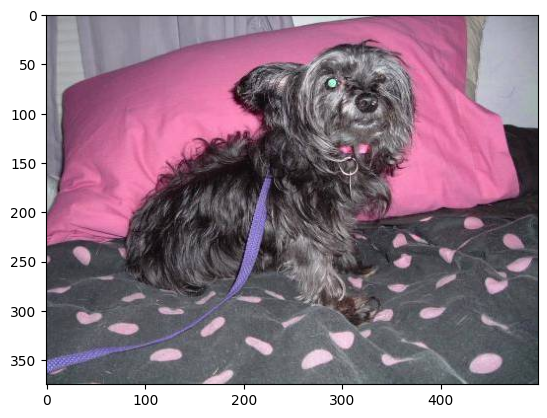

In [30]:
# Load the input image
input_image = cv2.imread("/content/cats and dogs/train/dogs/dog.0.jpg")

# Save the input image to a file
cv2.imwrite("input_image.jpg", input_image)

# Predict the input image cat or dog
output = predict_image("input_image.jpg")
print("Predict:", output)
plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))

1/1 [==============================] - 0s 21ms/step
Predict: cat


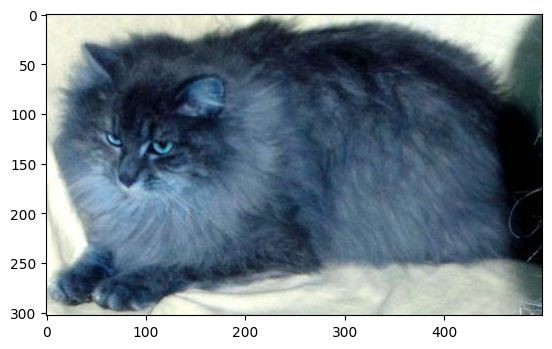

In [34]:
# Load the input image
input_image = cv2.imread("/content/cats and dogs/train/cats/cat.139.jpg")

# Save the input image to a file
cv2.imwrite("input_image.jpg", input_image)

# Predict the input image cat or dog
output = predict_image("input_image.jpg")
print("Predict:", output)
plt.imshow(input_image)